In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

### DecisionTree
It will try to make a tree that fit the dataset best

This is a weak model

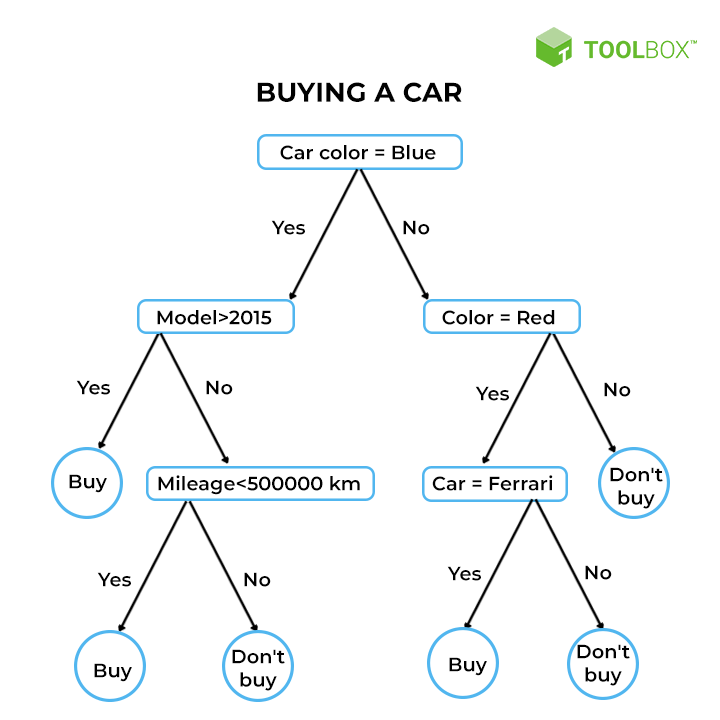

In [16]:
dataset = pd.read_csv('data/possum.csv')
dataset.dropna(inplace=True)
dataset.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [17]:
X = dataset[['Pop','age','skullw','taill','chest','belly']]
y = dataset['sex']

### Prepare for training

In [18]:
X['Pop'] = X['Pop'].map({'Vic': 0, 'other': 1})
y = y.map({'m': 0, 'f': 1})
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29900\2190091342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Pop'] = X['Pop'].map({'Vic': 0, 'other': 1})


In [19]:
dt = DecisionTreeClassifier()
dt.fit(X,y)
y_pred = dt.predict(X_test)
print('Decision Tree')
print('Accuracy: ',accuracy_score(y_test, y_pred))


Decision Tree
Accuracy:  0.38095238095238093


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Random Forest
Random Forest basicly is a collection of multiple tree. It uses some of technic in Machine Learning like Bagging and Boosting to ultilize multiple Decision Tree model, avoiding overfit and product a more robust result

[More about RF](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print('Random Forest')
print('Accuracy: ',accuracy_score(y_test, y_pred))

Random Forest
Accuracy:  0.6190476190476191
